<a href="https://colab.research.google.com/github/TillVollmer5/mass_spectroscopy/blob/main/Ionization_E_plot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import numpy as np
from google.colab import drive
import glob
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive
drive.mount('/content/drive', force_remount = True)

# Set path to the folder containing the CSV files
path = '/content/drive/My Drive/Ionization_E_plot'

# Get a list of all CSV files in the folder
files = glob.glob(path + '/Mix_4ug*.csv')

# Loop over the CSV files and load the data into NumPy arrays
data_arrays = []
for file in files:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file, header = 6)
    # Extract the data as a NumPy array
    data = df.to_numpy()
    # Append the data array to the list
    data_arrays.append(data)

# Print the number of files and the shape of each data array
print(f"Loaded {len(data_arrays)} files:")
for i, data in enumerate(data_arrays):
    print(f"File {i+1}: {data.shape}")


Mounted at /content/drive
Loaded 3 files:
File 1: (116, 8)
File 2: (130, 8)
File 3: (134, 8)


In [34]:
# Loop over the CSV files and load the data into NumPy arrays
for file in files:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file, header = 6)

    # Find rows with values larger than 2 and smaller than 10 in the first column
    mask1 = (df.iloc[:, 5] > 2) & (df.iloc[:, 5] < 10)
    # Exclude rows below a value of 3 in the second column
    mask2 = (df.iloc[:, 1] >= 5)
    #combine masks
    mask= mask1 & mask2
    filtered_df = df[mask]

    # Save the filtered rows to a new CSV file
    filtered_file = file.replace('.csv', '_filtered.csv')
    filtered_df.to_csv(filtered_file, index=False)

    # Print the number of rows saved to the new file
    print(f"Saved {len(filtered_df)} rows to {filtered_file}")

Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_1_pl_filtered.csv
Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_1_40eV_pl_filtered.csv
Saved 6 rows to /content/drive/My Drive/Ionization_E_plot/Mix_4ug_ml_1_70eV_pl_filtered.csv


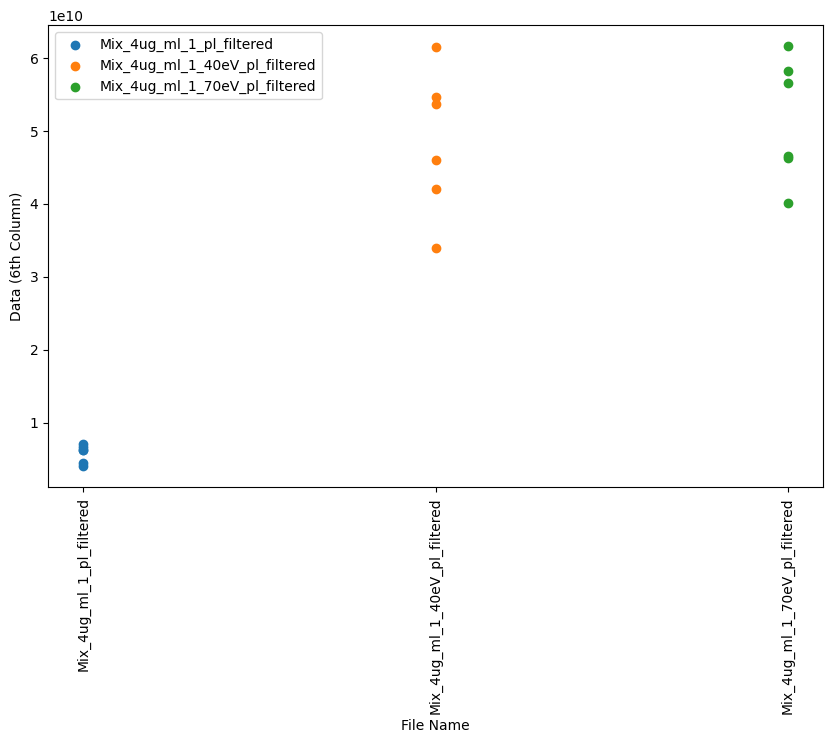

In [36]:
# Get a list of all filtered CSV files in the folder
files = glob.glob(path + '/Mix_4ug*_filtered.csv')

# Create an empty list to store the data and file names
data = []
names = []

# Loop over the filtered CSV files and load the data into NumPy arrays
for file in files:
    # Load the CSV file into a pandas DataFrame
    df = pd.read_csv(file)

    # Add the data and file name to the lists
    data.append(df.iloc[:, 4])
    names.append(file.split('/')[-1].split('.')[0])

# Plot the data as a scatter plot
plt.figure(figsize=(10, 6))
for i in range(len(data)):
    plt.scatter([names[i]] * len(data[i]), data[i], label=names[i])

# Set the x-axis label and rotate the labels
plt.xlabel('File Name')
plt.xticks(rotation=90)

# Set the y-axis
plt.ylabel('Data (6th Column)')

# Add a legend and show the plot
plt.legend()
plt.show()